<a href="https://colab.research.google.com/github/Akshay069/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem Statement**

---
---


In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

###**Data Overview**

---
Fisrt things first!\
Data is nothing but a information so,
I will first load data using Pandas DataFrame and take a tour of our data on the basis of which we will take decisions further.

In [204]:
# Importing important liabraries required futher in the process.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [205]:
# Importing google drive access to read the csv file in the colaboratory.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
# Reading data using pandas Dataframe.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Machine Learning/Supervised Learning/classification Project /Copy of data_mobile_price_range.csv')

In [207]:
# Take a look at fisrt five observations.
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [208]:
# Let see the size of this dataset.
print('- Number of row =',df.shape[0])
print('- Number of column =',df.shape[1])

- Number of row = 2000
- Number of column = 21


In [209]:
# Lets see what are different variables and their description.
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

###Below mention is the description about each variable in this dataset.






>**Battery_power** - Total energy a battery can store in one time measured in mAh. \
**Blue** - Has bluetooth or not. \
**Clock_speed** - speed at which microprocessor executes instructions. \
**Dual_sim** - Has dual sim support or not. \
**Fc** - Front Camera mega pixels. \
**Four_g** - Has 4G or not. \
**Int_memory** - Internal Memory in Gigabytes. \
**M_dep** - Mobile Depth in cm. \
**Mobile_wt** - Weight of mobile phone. \
**N_cores** - Number of cores of processor. \
**Pc** - Primary Camera mega pixels. \
**Px_height** - Pixel Resolution Height. \
**Px_width** - Pixel Resolution Width. \
**Ram** - Random Access Memory in Mega Bytes. \
**Sc_h** - Screen Height of mobile in cm. \
**Sc_w** - Screen Width of mobile in cm. \
**Talk_time** - longest time that a single battery charge will last when you are. \
**Three_g** - Has 3G or not. \
**Touch_screen** - Has touch screen or not. \
**Wifi** - Has wifi or not. \
**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

* As the problem statement suggests that we need to predict the price range instead of the actual price of the mobile phone which turn it down to the classification problem and as the label (Price_range) is divided into four ranges 0(for low price range), 1(for median price range), 2(for high price range) and 3(for extreamly high price range).

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

* It is clear from above summary that there is no null value present in our dataset which makes easier for us that we don't have to worry about the null values treatment. \
* Still, will look for other things before moving towards the model implplentation such as duplicate rows, outliers detection and relationship of variables and distribution of the data and finally the imbalance of the output variable.

In [211]:
# Lets see if there any duplicate present in out dataset.
df.duplicated().sum()

0

* Thats great! there is no duplicates present in our data.

In [212]:
# Lets see the descriptive summary.
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


* From the above observation, the Minimum value of px_height and sc_w is zero which is not fair. it has to be rectified and will fill these with average value

In [213]:
# First will see how many such observations are there with zero minimum value.
print('Total phones with sc_w value as zero is',len(df[df['sc_w'] == 0]))

print('Total phones with px_height value as zero is',len(df[df['px_height'] == 0]))

Total phones with sc_w value as zero is 180
Total phones with px_height value as zero is 2


In [214]:
# Before moving forward lets first make a copy of our dataset so that we can do changes on it.
df_copy = df.copy()
# Lets fill these values.
df_copy['sc_w'].replace(0,df_copy['sc_w'].mean(axis=0), inplace=True)
df_copy['px_height'].replace(0,df['px_width'].mean(axis=0), inplace=True)

In [215]:
# Lets check the changes.
print('Total phones with sc_w value as zero is',len(df_copy[df_copy['sc_w'] == 0]))

print('Total phones with px_height value as zero is',len(df_copy[df_copy['px_height'] == 0]))

Total phones with sc_w value as zero is 0
Total phones with px_height value as zero is 0


* Great! Now everything seems okay with it as we have successfully replaced zero with mean values.


Some other observations from the above part.

* Well i was confused with the variable name **Talk_time** - longest time that a single battery charge will last when you are. \

* the description about this is bit confusing and the name of the variable is also not apprrpriate in my perspective so, i'm going change it sure with relatable one. \

* but before that I have cleared from descriptive table that the meaning of this information is nothing but the 'How long the mobile battery(charging) last after it gets fully charged' so, will rename it from **'Talk_time'** to **'charge_time'** 


In [216]:
# As discussed above lets rename column name.
df.rename(columns = {'talk_time' : 'charge_time'}, inplace=True)
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'charge_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

###**Exploratory Data Analysis.**

---

In this section I'm going to perform Univeriate and Bivariate analysis to visualize distribution across all columns and the relationship between features and label. further will see correlation between feature to see multicolinearity.

In [217]:
# Lets seperate dependent and independent variables 
X = df_copy.drop(['price_range'], axis=1)
Y = df_copy['price_range']

###**Univeriate Analysis**

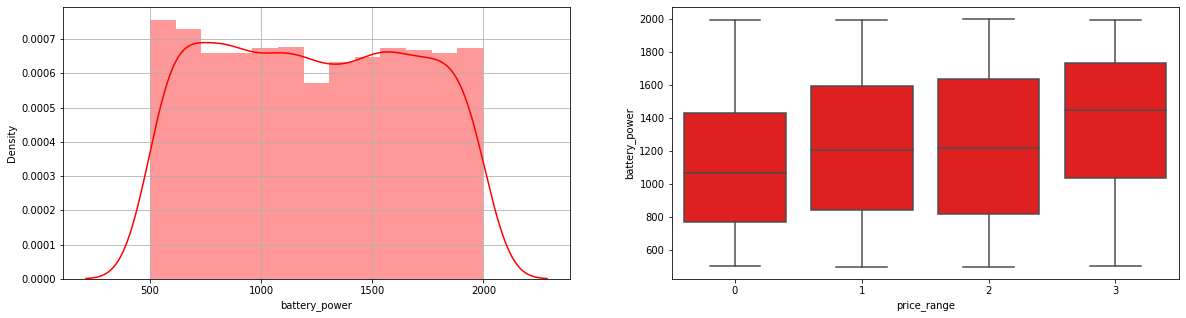

----------------------------------------------------------------------------------------------------------------------------------------------------------------


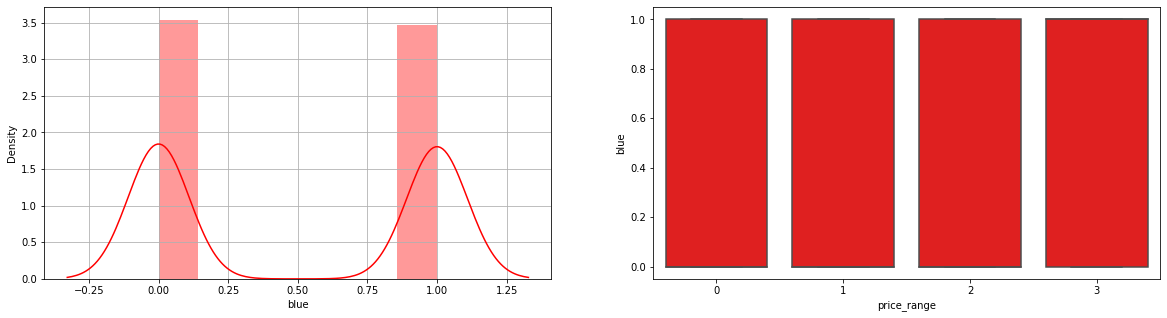

----------------------------------------------------------------------------------------------------------------------------------------------------------------


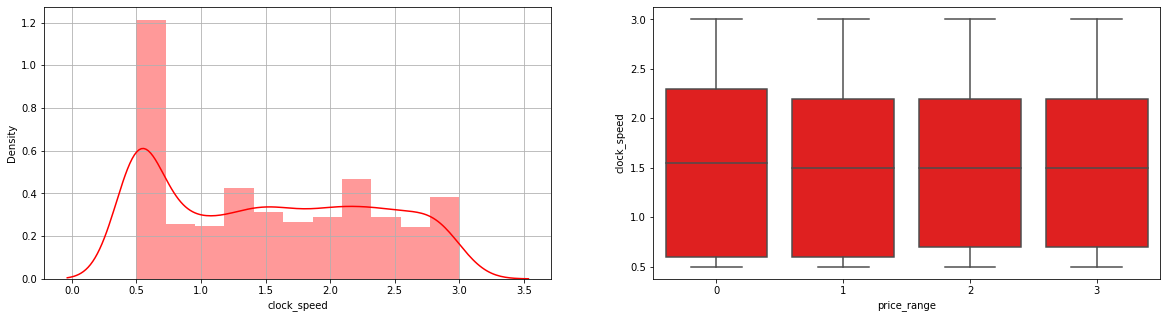

----------------------------------------------------------------------------------------------------------------------------------------------------------------


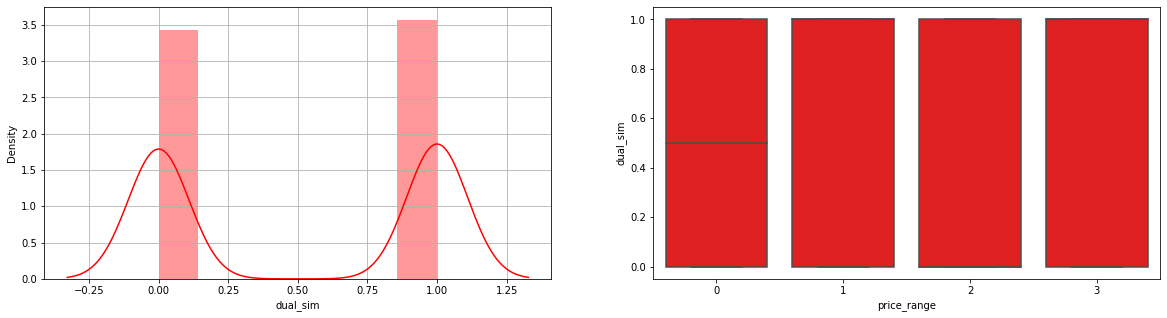

----------------------------------------------------------------------------------------------------------------------------------------------------------------


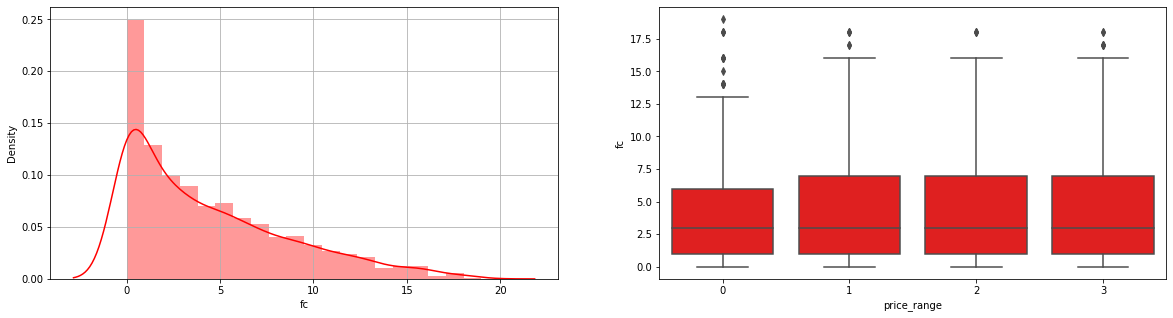

----------------------------------------------------------------------------------------------------------------------------------------------------------------


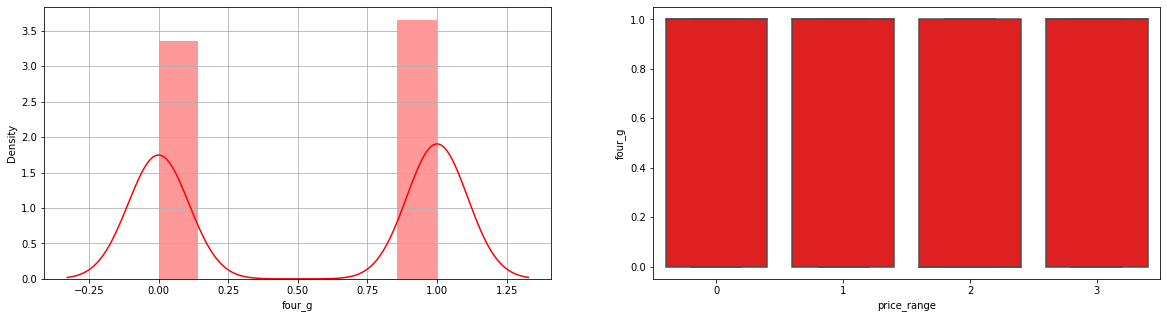

----------------------------------------------------------------------------------------------------------------------------------------------------------------


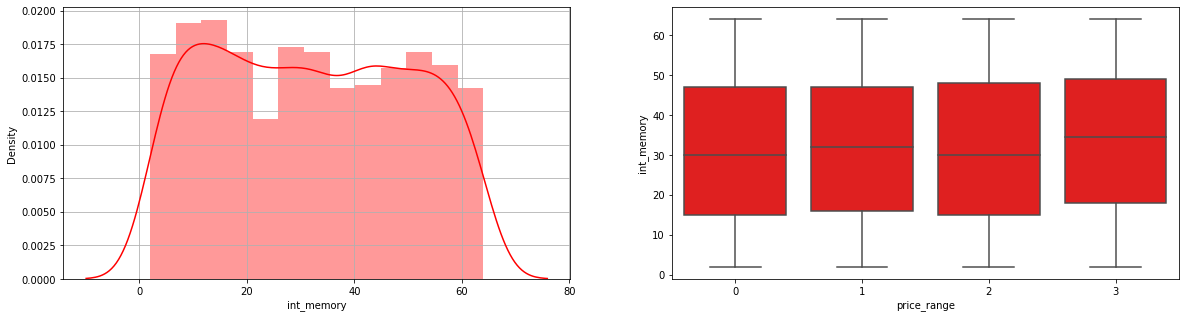

----------------------------------------------------------------------------------------------------------------------------------------------------------------


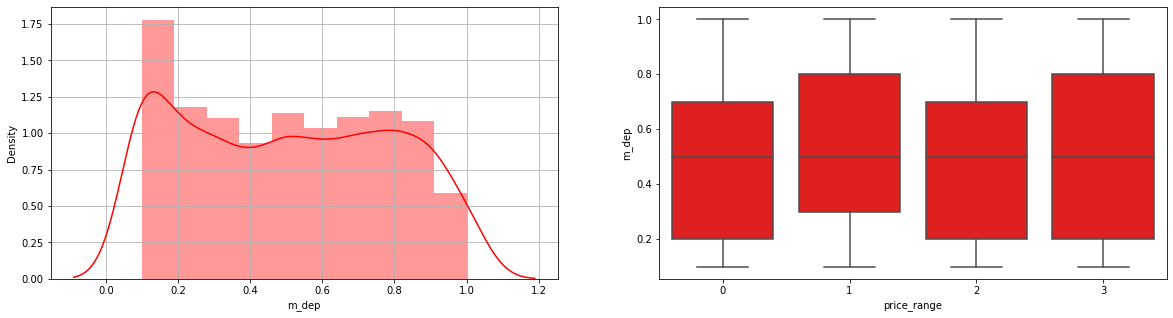

----------------------------------------------------------------------------------------------------------------------------------------------------------------


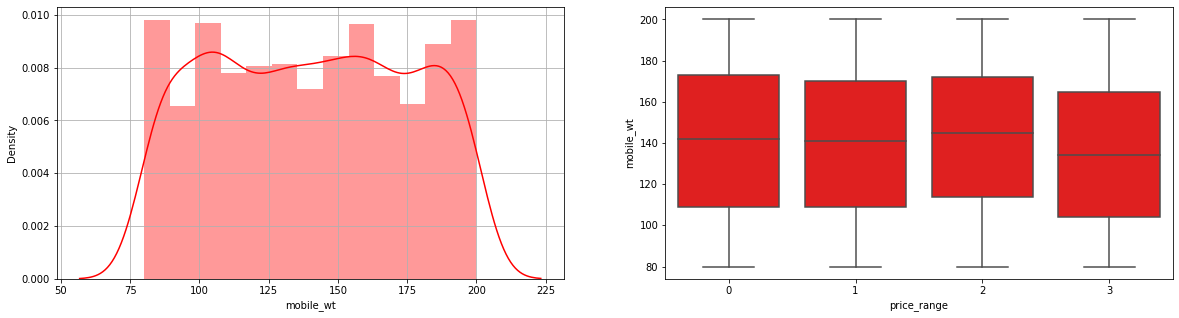

----------------------------------------------------------------------------------------------------------------------------------------------------------------


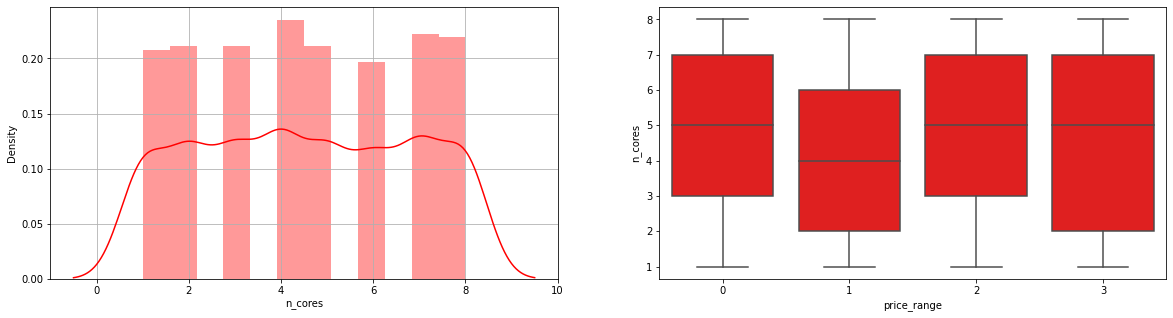

----------------------------------------------------------------------------------------------------------------------------------------------------------------


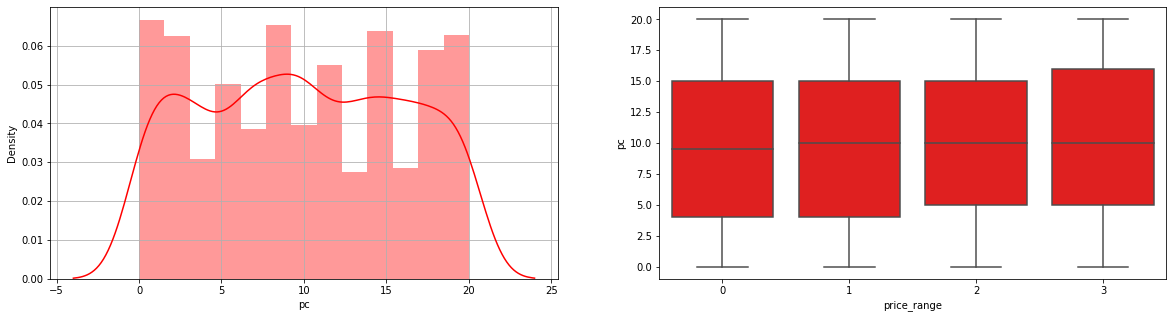

----------------------------------------------------------------------------------------------------------------------------------------------------------------


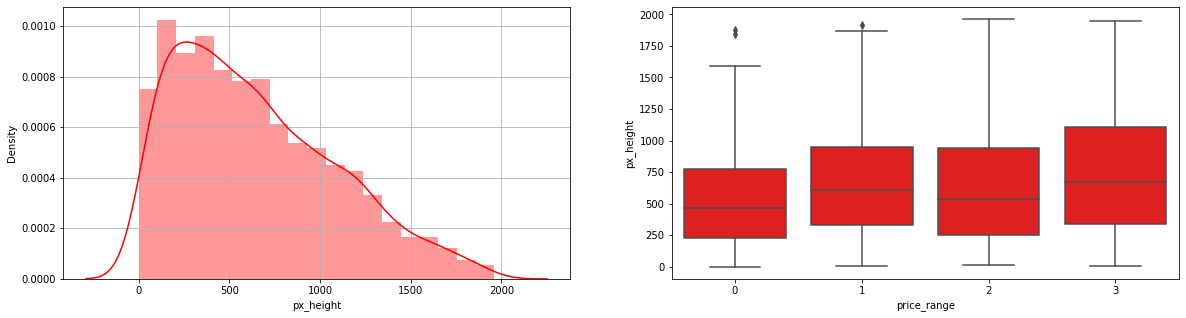

----------------------------------------------------------------------------------------------------------------------------------------------------------------


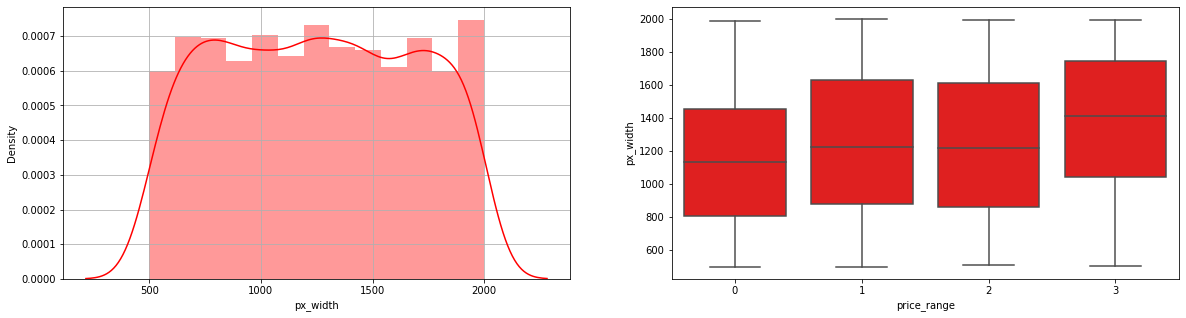

----------------------------------------------------------------------------------------------------------------------------------------------------------------


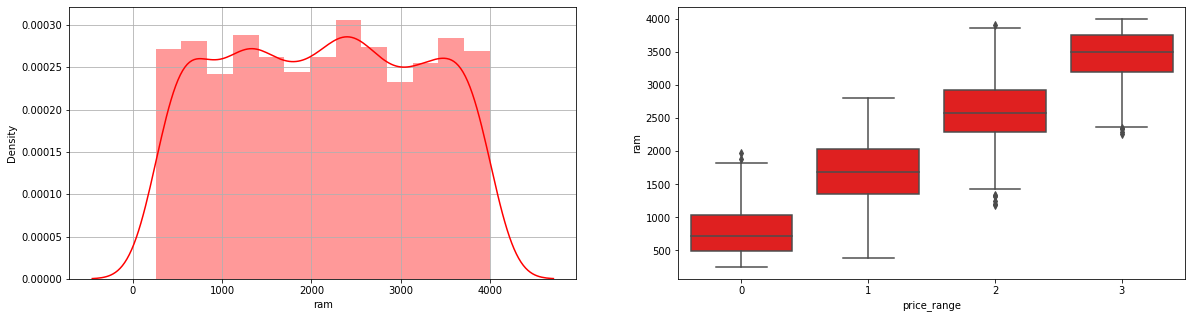

----------------------------------------------------------------------------------------------------------------------------------------------------------------


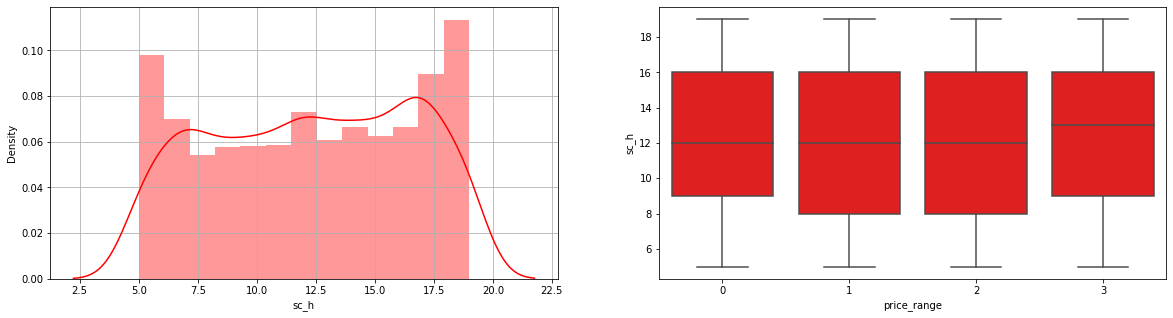

----------------------------------------------------------------------------------------------------------------------------------------------------------------


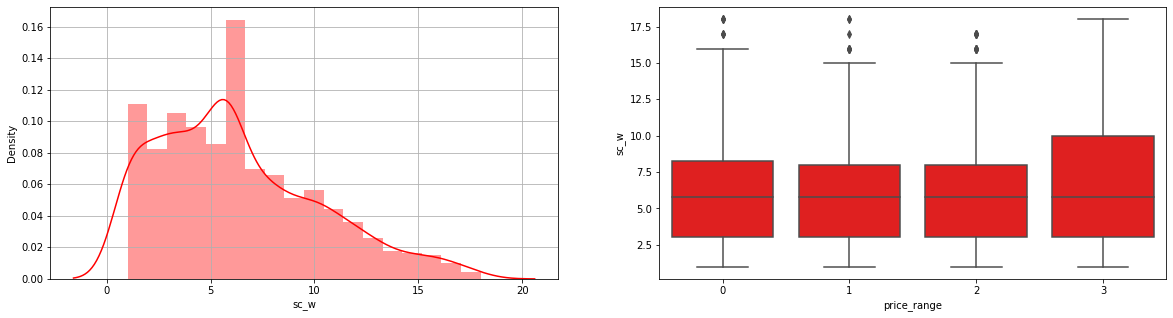

----------------------------------------------------------------------------------------------------------------------------------------------------------------


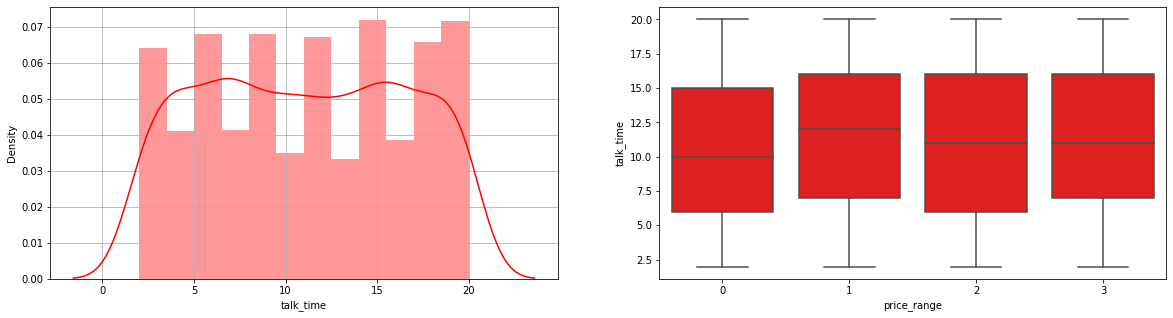

----------------------------------------------------------------------------------------------------------------------------------------------------------------


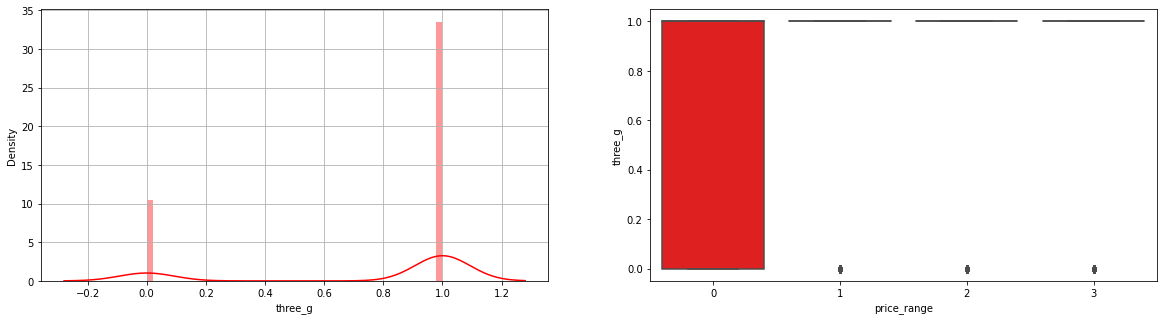

----------------------------------------------------------------------------------------------------------------------------------------------------------------


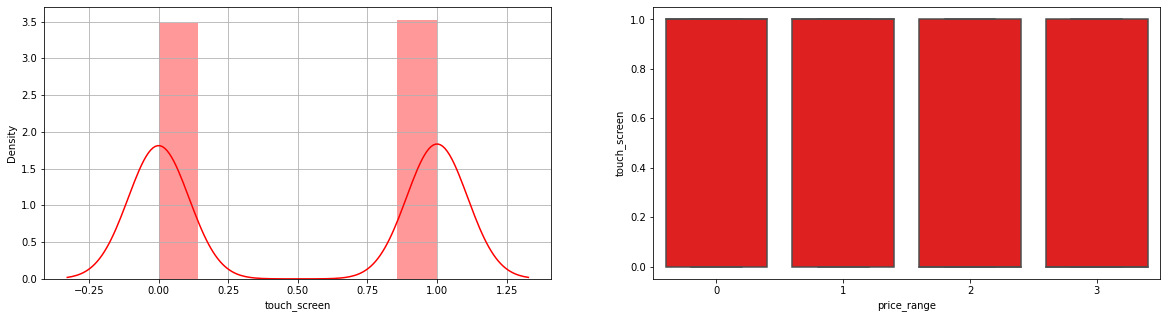

----------------------------------------------------------------------------------------------------------------------------------------------------------------


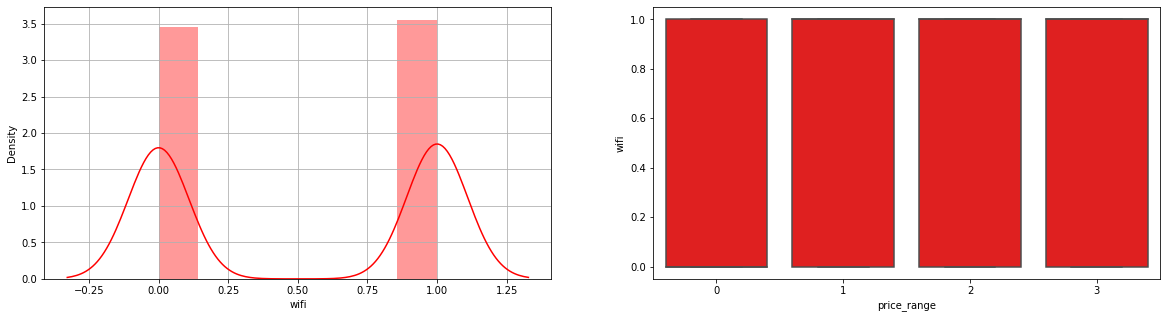

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [218]:
# Lets see the distribution of the data across all the features.
for feature in X:
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  sns.distplot(df_copy[feature], color='red')
  plt.ylabel('Density')
  plt.grid()
  plt.subplot(122)
  sns.boxplot(df_copy['price_range'],df_copy[feature], color='red')
  plt.show()
  print('-----'*32)

* From above distribution plot we found that almost all the variables are in guassian distribution but some of the variables like (sc_w,px_height,fc) having kind of skewness (positively skewed) data. again i have tried logarithmic transformation but results was not so good so we keep this as it is.

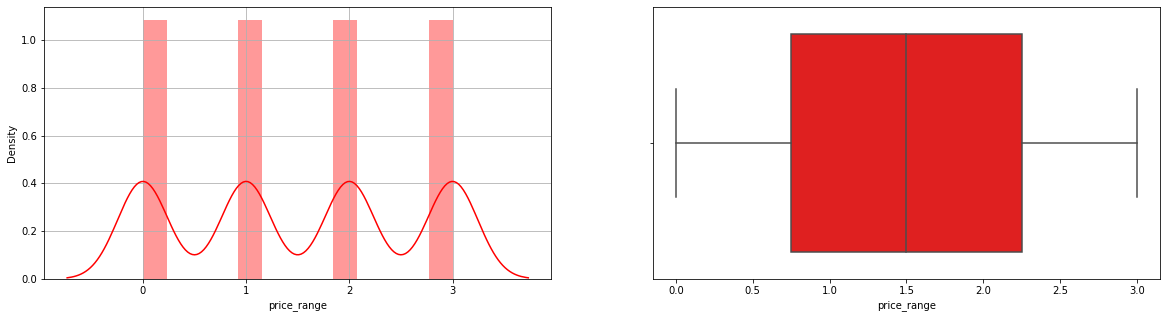

In [219]:
# Lets see the distribution of the dependent variable.
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(df_copy['price_range'], color='red')
plt.ylabel('Density')
plt.xlabel('price_range')
plt.grid()
plt.subplot(122)
sns.boxplot(df_copy['price_range'], color='red')
plt.xlabel('price_range')
plt.show()

In [220]:
# Checking for the imbalance of the dependent variable.
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

* Thats great that there is no imbalance in our label(independent variable) even though all the classes are evenly distributed across the axis and that will definetly help in predictions of classes.

In [221]:
# Let's seperate categorical and continous variables.
cat = [ 'blue',  'dual_sim',  'four_g', 'three_g', 'touch_screen', 'wifi', 'n_cores']

con = ['battery_power','clock_speed','fc','int_memory','m_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'talk_time','sc_h', 'sc_w']

###**Bivariate Analysis**
1. Continuous Variable

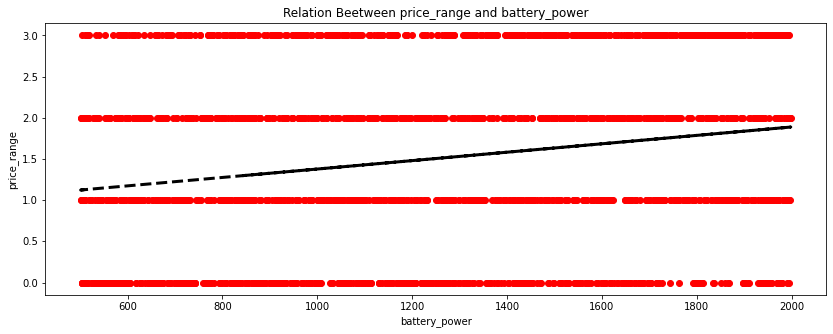

------------------------------------------------------------------------------------------------------------------------


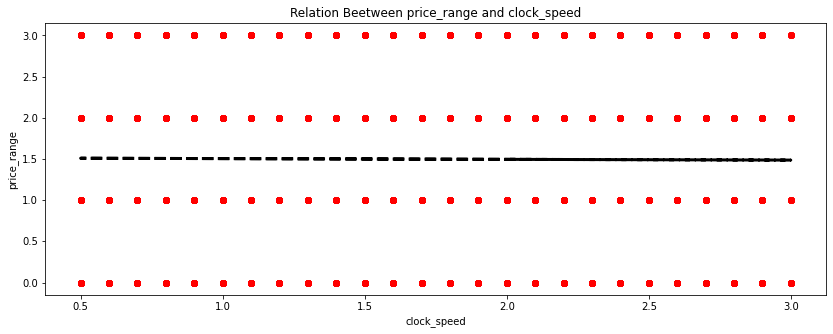

------------------------------------------------------------------------------------------------------------------------


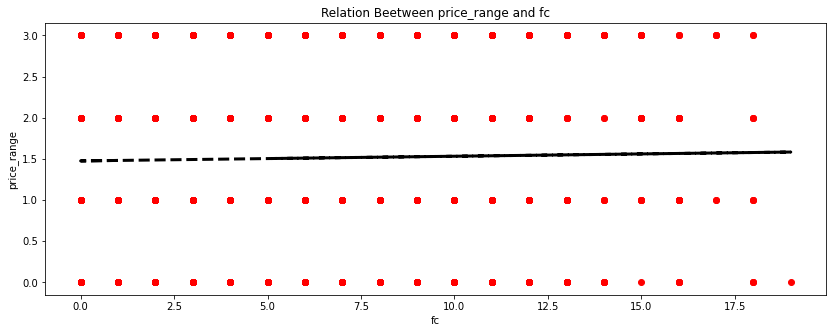

------------------------------------------------------------------------------------------------------------------------


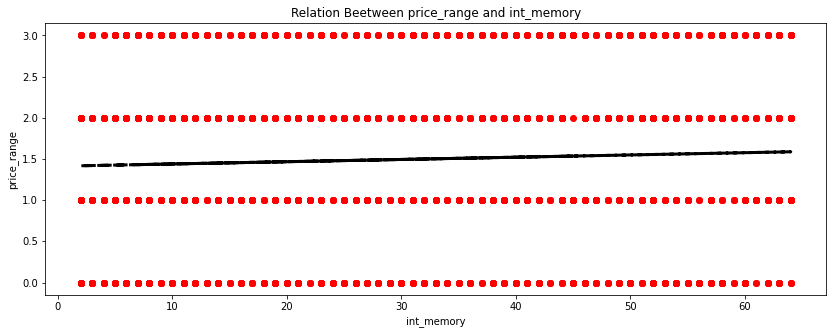

------------------------------------------------------------------------------------------------------------------------


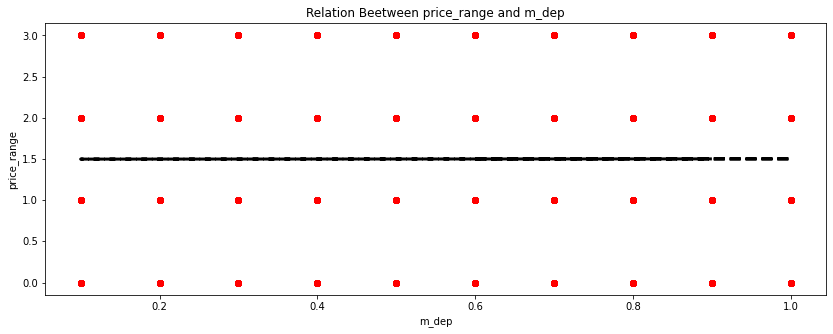

------------------------------------------------------------------------------------------------------------------------


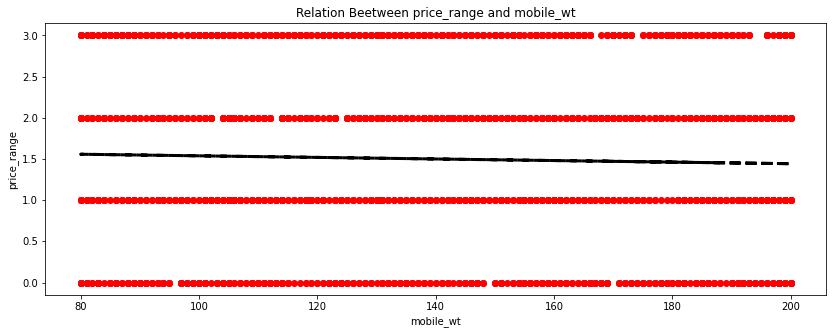

------------------------------------------------------------------------------------------------------------------------


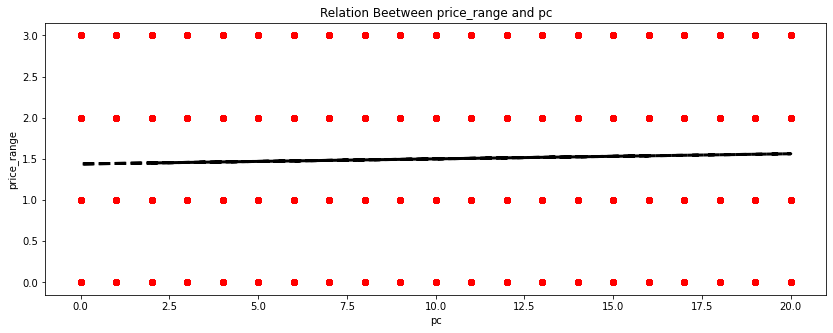

------------------------------------------------------------------------------------------------------------------------


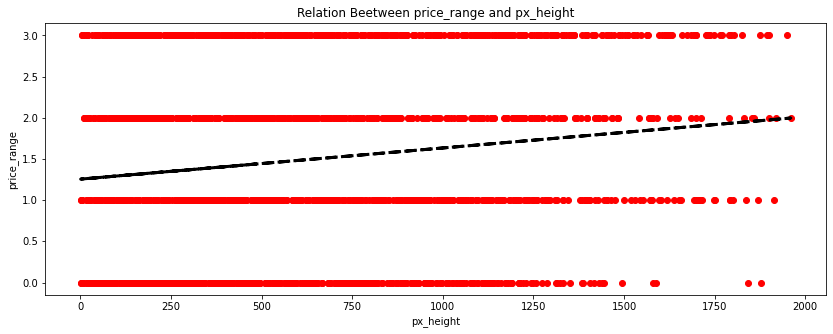

------------------------------------------------------------------------------------------------------------------------


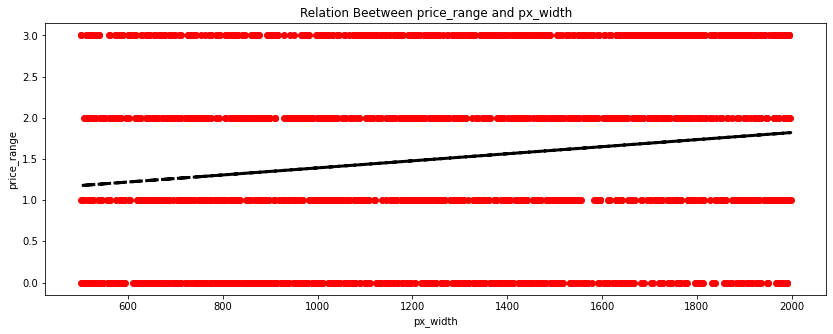

------------------------------------------------------------------------------------------------------------------------


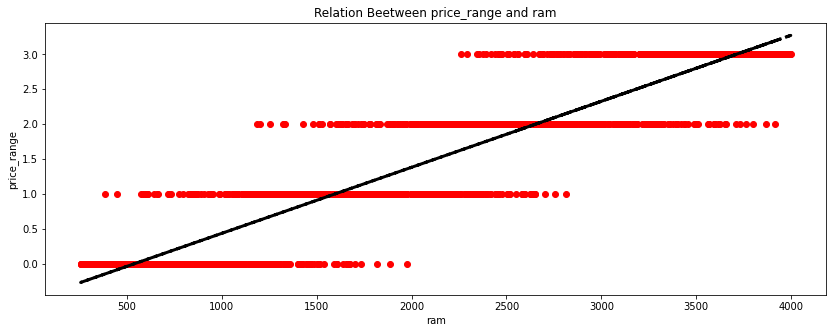

------------------------------------------------------------------------------------------------------------------------


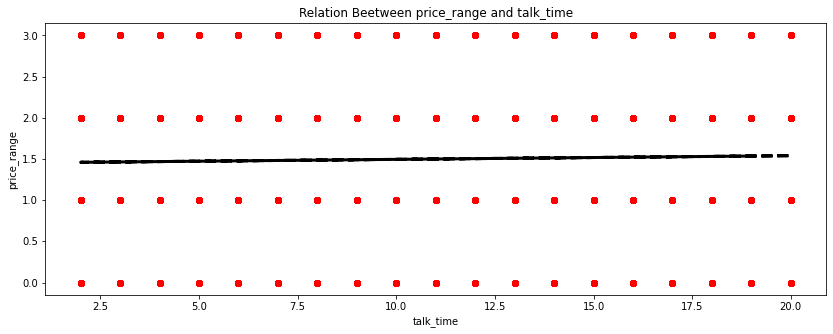

------------------------------------------------------------------------------------------------------------------------


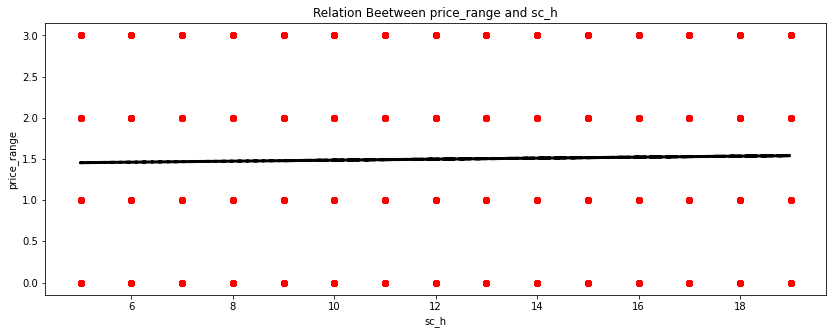

------------------------------------------------------------------------------------------------------------------------


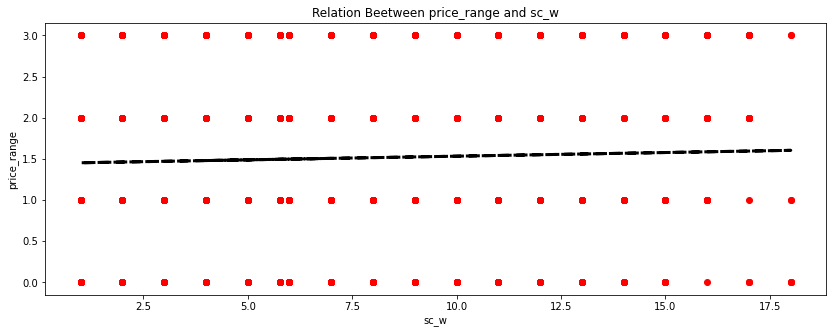

------------------------------------------------------------------------------------------------------------------------


In [222]:
# Now lets look for relationship of independent continuous variables with dependent variable.
for i in con:
  plt.figure(figsize=(14,5))
  label = df_copy['price_range']
  features = df_copy[i]
  plt.scatter(x=features, y=label, color='Red')
  plt.xlabel(i)
  plt.ylabel('price_range')
  plt.title(f'Relation Beetween price_range and {i}')
  z = np.polyfit(df_copy[i], df_copy['price_range'],1)
  y_hat = np.poly1d(z)(df_copy[i])
  plt.plot(df_copy[i], y_hat, 'r--',lw=3, color='black')
  plt.show()
  print('-----'*24)

* From the above scatter plot. I have ploted the relationship between all the independent variable with the dependent one. and from from above figure it can be said that the price of the mobile most dependent on the **Battery_capacity** and **Ram**. and this result is quit unclear for me at this point of time will see further in the correlation plot if we find something different.

2. Categorical Variable

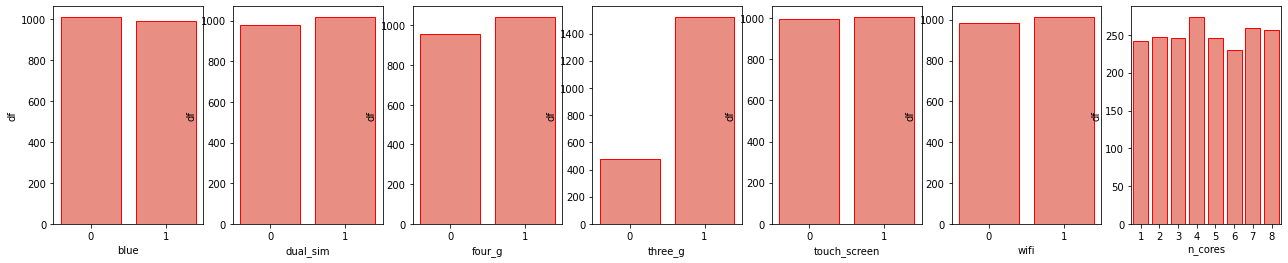

In [223]:
# Distribution of categories of each categorical variable.
fig, axs = plt.subplots(1, len(cat), figsize=(22,4))

for i in range(len(cat)):
    sns.countplot(x=df_copy[cat[i]], ax=axs[i], color='salmon', edgecolor='red')
    axs[i].set_ylabel('df')


* As we can see in the plot above, apart from variable 'three_g' and 'n_cores' feature, almost all of the other variables have equal distribution of the categories, three_g can play an important role in prediction.
 

In [224]:
# function to plot the distribution of categorical feature
# for each price range category
def plot(column_name):
    fig, axs = plt.subplots(1,4, figsize=(16, 4))
    for i in range(4):
        sns.countplot(x=df[df['price_range']==i][column_name] , ax=axs[i], color = 'salmon', edgecolor = 'red')
        axs[i].set_xlabel(f'{column_name} category')
        axs[i].set_title(f'for price_range = {i}')

Now let us see the categorical variables distribution along the different categories of target variable that is 'price_range'

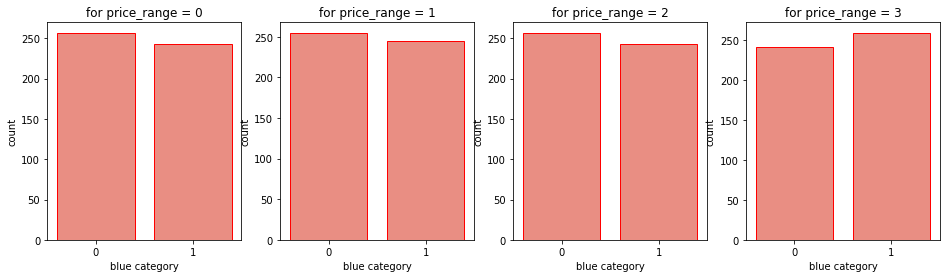

In [225]:
plot('blue')

* The availability of bluetooth is same across all categories of target variable. 

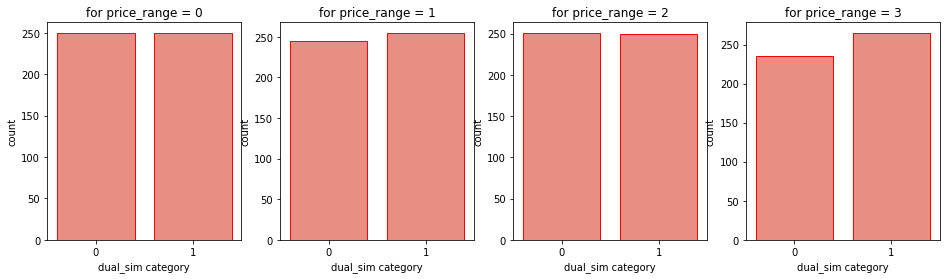

In [226]:
plot('dual_sim')

* The dual_sim feature distributions shows a little pattern for only price_category 3. For rest of them it has almost half distribution.

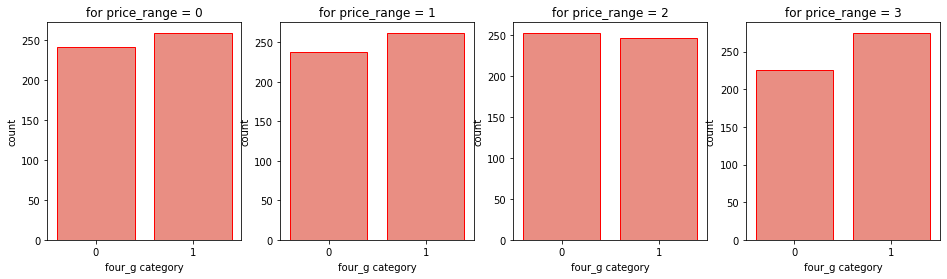

In [227]:
plot('four_g')

* The availability of four_g variable is also shows similar distribution for each class except price_range 3.

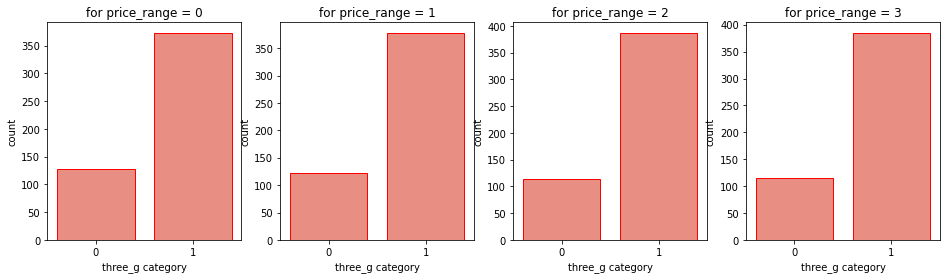

In [228]:
plot('three_g')

* The availability of 3G shows almost similar distribution for each price range, which is not good for predictions beacause it might be confusing for model to chose any class for 3G mobile phones.
* Will think on it and try to figure out something on this in further section in this project.


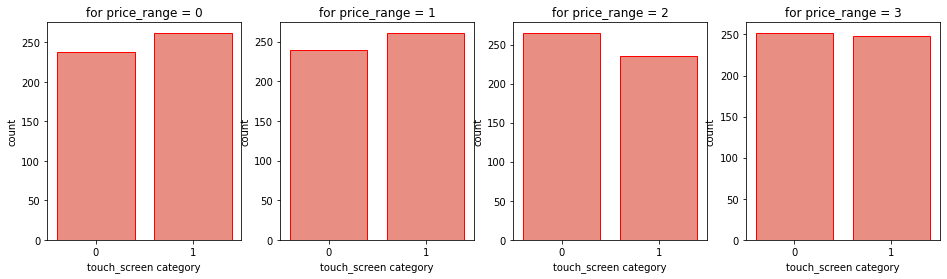

In [229]:
plot('touch_screen')

* Touch screen feature shows very little variation along the different price categories, which won't help much in price range prediction.
* Well from this one thing is clear that even the non touchscreen phone also can be costlier.

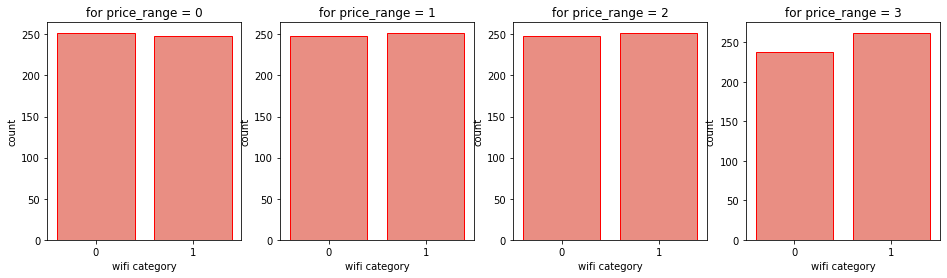

In [230]:
plot('wifi')

* The wifi feature shows quite similar features except for the price_range 3

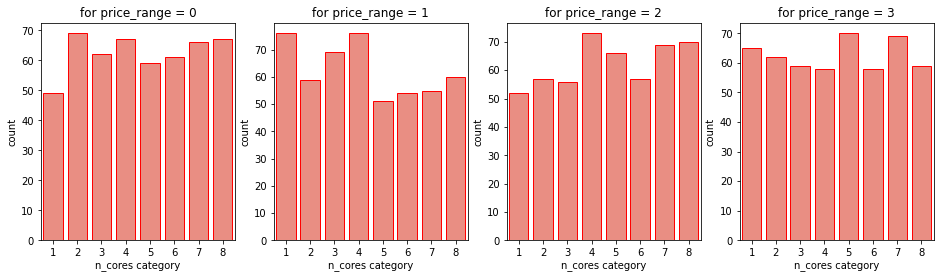

In [231]:
plot('n_cores')

* number of cores in mobile shows some interesting patterns for different price ranges. This might be a helpful feature in price range prediction.

Some of the important points we came with after this analysis are:
* There are only few features which are deciding the price range of the mobile phones.
* Even though expensive mobiles can have fewer features. Like you can find expensive mobile phones with no wifi, no touch screen, no 4G support, no dual sim and even with no bluetooth support. and thats strange!
* There are only few feature that are predicting price for mobile phone even these are also that dependent. But still in this data set these features are going to help for predictions.

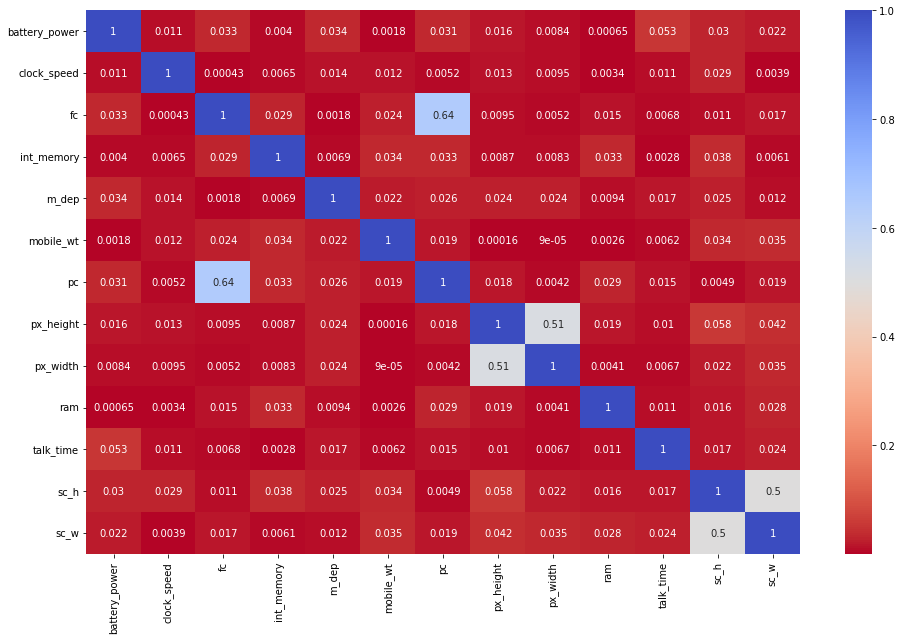

In [232]:
plt.figure(figsize = (16,10))
sns.heatmap(abs(df_copy[con].corr()), annot=True, cmap = 'coolwarm_r');

* There is some colinearity in feature pairs ('pc', 'fc'), ('px_width', 'px_height') and ('sc_h','sc_w'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

* Also if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature.

* And sc_h which is sceen height increases with the sc_w which is screen width which menas overall screen dimensions are increasing. This also need to be on parameter

* From three_g column analysis we fount that there is a same distribution of data throughout all the classes which is not good for prediction will figure out something on this in feature engineering section.

###**Feature Engineering**

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process. Feature Engineering is an art.

In [233]:
# Lets make a single feature 'Pixels' out of px_height and px_width.
df_copy['pixels'] = df_copy['px_height'] * df_copy['px_width']
con.append('pixels')

In [234]:
# Lets drop the old features as we have created new feature.
df_copy.drop(['px_height', 'px_width'], axis=1, inplace=True)
con.remove('px_height')
con.remove('px_width')

* I have created a new feature by multiplying px_height and px_width as they both denotes the pixel dimensions and droped the both features px_height and px_width as they no more required for the model.

In [235]:
# Lets add 3G and 4G and make a new feature out of it
df_copy['network'] = df_copy['four_g'] + df_copy['three_g']

* In the above analysis section, we can look at the combination of feature 3G and 4G. Interestingly, we have observed that there are zero mobile phones that supports 4G but not 3G. That means every phone that supports 4G, will support 3G by default.

* So, I'm gonna make a single feature called 'network' by adding  3G and 4G features

* 0 means neither of 3G or 4G
* 1 means only 3G but not 4G
* 2 means both 3G and 4G

In [236]:
# drop the 3G and 4G columns
df_copy.drop(['four_g', 'three_g'], inplace=True, axis=1)
cat.remove('four_g')
cat.remove('three_g')

In [237]:
# Lets make new column by adding sc_w and sc_h.
df_copy['screen_size'] = ((df_copy['sc_h']**2)+(df_copy['sc_w']**2))**0.5

df_copy.drop(['sc_h','sc_w'], axis=1 ,inplace=True)
con.remove('sc_h')
con.remove('sc_w')
con.append('screen_size')

* Converting columns 'sc_h'(screen height) and 'sc_w'(screen width in a single column 'screen_size'(total screen size) , it will be the vertical length of the mobile.

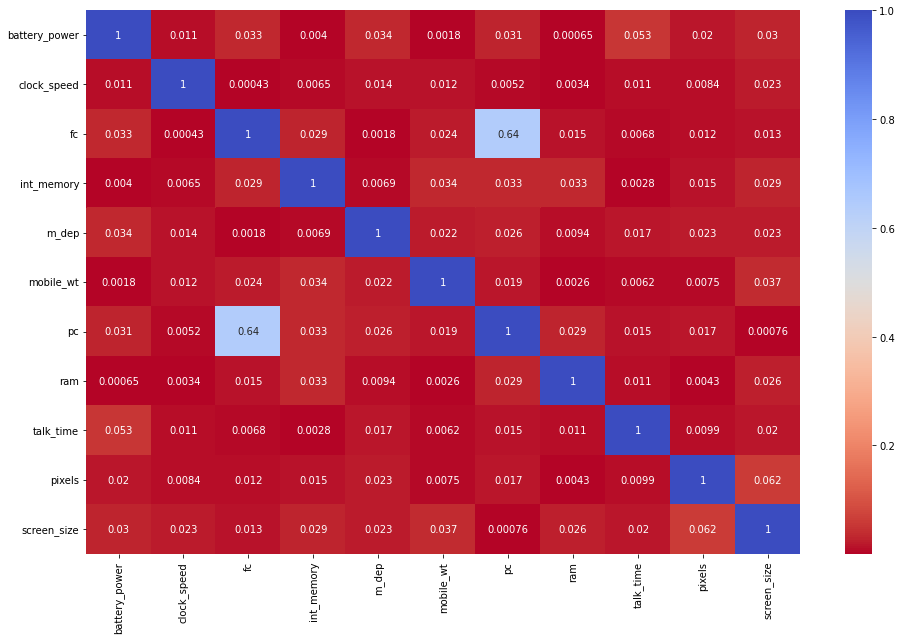

In [238]:
# Lets check it again.
plt.figure(figsize = (16,10))
sns.heatmap(abs(df_copy[con].corr()), annot=True, cmap = 'coolwarm_r');

* We can say that after understanding heatmap there is next to no multicolinearity exists in the dataset. every feature has distinct relationship with the dependent variable. variables like pixel dimentions ans screen dimensions has kind of colinearity which we have treated above in this section.
* Front Camera megapixels and Primary camera megapixels are different variables and showing collinearity with each other. So we'll be keeping them as they are.

In [239]:
df_copy.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,price_range,pixels,network,screen_size
0,842,0,2.2,0,1,7,0.6,188,2,2,2549,19,0,1,1,15120.0,0,11.401754
1,1021,1,0.5,1,0,53,0.7,136,3,6,2631,7,1,0,2,1799140.0,2,17.262677
2,563,1,0.5,1,2,41,0.9,145,5,6,2603,9,1,0,2,2167308.0,2,11.180340
3,615,1,2.5,0,0,10,0.8,131,6,9,2769,11,0,0,2,2171776.0,1,17.888544
4,1821,1,1.2,0,13,44,0.6,141,2,14,1411,15,1,0,1,1464096.0,2,8.246211
